CSC311 - Assignment 2

Anlan Wu

utorid: wuanlan

In [1]:
# %load ./q2_materials/utils.py
import numpy as np

def sigmoid(x):
    """Computes the element wise logistic sigmoid of x.

    Inputs:
        x: Either a row vector or a column vector.
    """
    return 1.0 / (1.0 + np.exp(-x))

def load_train():
    """Loads training data."""
    with open('./q2_materials/mnist_train.npz', 'rb') as f:
        train_set = np.load(f)
        train_inputs = train_set['train_inputs']
        train_targets = train_set['train_targets']
    return train_inputs, train_targets 

def load_train_small():
    """Loads small training data."""
    with open('./q2_materials/mnist_train_small.npz', 'rb') as f:
        train_set_small = np.load(f)
        train_inputs_small = train_set_small['train_inputs_small']
        train_targets_small = train_set_small['train_targets_small']
    return train_inputs_small, train_targets_small

def load_valid():
    """Loads validation data."""
    with open('./q2_materials/mnist_valid.npz', 'rb') as f:
        valid_set = np.load(f)
        valid_inputs = valid_set['valid_inputs']
        valid_targets = valid_set['valid_targets']
    
    return valid_inputs, valid_targets 

def load_test():
    """Loads test data."""
    with open('./q2_materials/mnist_test.npz', 'rb') as f:
        test_set = np.load(f)
        test_inputs = test_set['test_inputs']
        test_targets = test_set['test_targets']

    return test_inputs, test_targets 


$f: \mathbb{R}^2 \rightarrow \mathbb{R} $

In [2]:
# %load ./q2_materials/l2_distance.py
import numpy as np

def l2_distance(a, b):
    """Computes the Euclidean distance matrix between a and b.
    """

    if a.shape[0] != b.shape[0]:
        raise ValueError("A and B should be of same dimensionality")

    aa = np.sum(a**2, axis=0)
    bb = np.sum(b**2, axis=0)
    ab = np.dot(a.T, b)

    return np.sqrt(aa[:, np.newaxis] + bb[np.newaxis, :] - 2*ab)


In [3]:
# %load ./q2_materials/check_grad.py
import numpy as np
import numpy.linalg as LA

def check_grad(func, X, epsilon, *args):
    """
    checkgrad checks the derivatives in a function, by comparing them to finite
    differences approximations. The partial derivatives and the approximation
    are printed and the norm of the diffrence divided by the norm of the sum is
    returned as an indication of accuracy.

    usage: checkgrad(func, X, epsilon, P1, P2, ...)

    where X is the argument and epsilon is the small perturbation used for the finite
    differences. and the P1, P2, ... are optional additional parameters which
    get passed to f. The function f should be of the type

    (fX, dfX) = func(X, P1, P2, ...)

    where fX is the function value and dfX is a vector of partial derivatives.

    Original Author: Carl Edward Rasmussen, 2001-08-01.

    Ported to Python 2.7 by JCS (9/21/2013).
    """

    if len(X.shape) != 2 or X.shape[1] != 1:
        raise ValueError("X must be a vector")

    y, dy, = func(X, *args)[:2]         # get the partial derivatives dy

    dh = np.zeros((len(X), 1))

    for j in range(len(X)):
        dx = np.zeros((len(X), 1))
        dx[j] += epsilon
        y2 = func(X+dx, *args)[0]
        dx = -dx
        y1 = func(X+dx, *args)[0]
        dh[j] = (y2 - y1)/(2*epsilon)

    print(np.hstack((dy, dh)))          # print the two vectors
    d = LA.norm(dh-dy)/LA.norm(dh+dy)  # return norm of diff divided by norm of sum

    return d


In [4]:
# %load ./q2_materials/run_knn.py
import numpy as np
#from l2_distance import l2_distance

def run_knn(k, train_data, train_labels, valid_data):
    """Uses the supplied training inputs and labels to make
    predictions for validation data using the K-nearest neighbours
    algorithm.

    Note: N_TRAIN is the number of training examples,
          N_VALID is the number of validation examples, 
          and M is the number of features per example.

    Inputs:
        k:            The number of neighbours to use for classification 
                      of a validation example.
        train_data:   The N_TRAIN x M array of training
                      data.
        train_labels: The N_TRAIN x 1 vector of training labels
                      corresponding to the examples in train_data 
                      (must be binary).
        valid_data:   The N_VALID x M array of data to
                      predict classes for.

    Outputs:
        valid_labels: The N_VALID x 1 vector of predicted labels 
                      for the validation data.
    """

    dist = l2_distance(valid_data.T, train_data.T)
    nearest = np.argsort(dist, axis=1)[:,:k]

    train_labels = train_labels.reshape(-1)
    valid_labels = train_labels[nearest]

    # note this only works for binary labels
    valid_labels = (np.mean(valid_labels, axis=1) >= 0.5).astype(np.int)
    valid_labels = valid_labels.reshape(-1,1)

    return valid_labels


In [ ]:
# %load ./q2_materials/plot_digits.py
import numpy as np
import matplotlib.pyplot as plt

def plot_digits(digit_array):
    """Visualizes each example in digit_array.

    Note: N is the number of examples 
          and M is the number of features per example.

    Inputs:
        digits: N x M array of pixel intensities.
    """

    CLASS_EXAMPLES_PER_PANE = 5

    # assume two evenly split classes
    examples_per_class = digit_array.shape[0]/2
    num_panes = int(np.ceil(float(examples_per_class)/CLASS_EXAMPLES_PER_PANE))

    for pane in xrange(num_panes):
        print("Displaying pane {}/{}".format(pane+1, num_panes))

        top_start = pane*CLASS_EXAMPLES_PER_PANE
        top_end = min((pane+1)*CLASS_EXAMPLES_PER_PANE, examples_per_class)
        top_pane_digits = extract_digits(digit_array, top_start, top_end)

        bottom_start = top_start + examples_per_class
        bottom_end = top_end + examples_per_class
        bottom_pane_digits = extract_digits(digit_array, bottom_start, bottom_end)

        show_pane(top_pane_digits, bottom_pane_digits)

def extract_digits(digit_array, start_index, end_index):
    """Returns a list of 28 x 28 pixel intensity arrays starting
    at start_index and ending at end_index.
    """

    digits = []
    for index in xrange(start_index, end_index):
        digits.append(extract_digit_pixels(digit_array, index))

    return digits

def extract_digit_pixels(digit_array, index):
    """Extracts the 28 x 28 pixel intensity array at the specified index.
    """

    return digit_array[index].reshape(28, 28)
                                
def show_pane(top_digits, bottom_digits):
    """Displays two rows of digits on the screen.
    """

    all_digits = top_digits + bottom_digits
    fig, axes = plt.subplots(nrows = 2, ncols = len(all_digits)/2)
    for axis, digit in zip(axes.reshape(-1), all_digits):
        axis.imshow(digit, interpolation='nearest', cmap=plt.gray())
        axis.axis('off')
    plt.show()


2.1 k-Nearest Neighbours

The classifier performs well for values of k between 3 and 7 with a classification rate of 86%. But increasing the value of k above 7 causes the classification rate to decrease due to overfitting the data. Values of k under 3 cause the classifier to underfit the data. I would pick a k-value of 5 since it sits right in the middle of the range of 3 and 7 where the classification rate is the highest. The classification rate for k* is 86%. The rate for k* + 2 and k* - 2 are both 86% as well. The test performance for these values of k correspond to the validation performance. The highest classification rates for the test set are when k is 5 or 8, for these k-values the rate is 94%. There is similarly a drop in the rate when we increase k to 9 and an increase from k = 1 to k = 5. The slight differences would be that for the test set there is an increase in rate from k = 3 to k = 5 and the classification rates are overall higher.

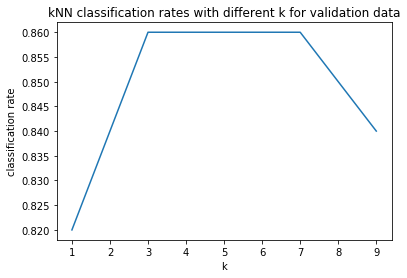

In [13]:
# %load ./q2_materials/knn_script.py
import matplotlib.pyplot as plt
#from utils import load_train, load_valid
#from run_knn import run_knn

train_inputs, train_targets = load_train()
valid_inputs, valid_targets = load_valid()

k = [1, 3, 5, 7, 9]
rates = []

for i in k:
    predictions = run_knn(i, train_inputs, train_targets, valid_inputs)
    num_correct = 0
    for j in range(len(predictions)):
        if predictions[j] == valid_targets[j]:
            num_correct += 1
    rates.append(num_correct/len(predictions))

plt.plot(k, rates)
plt.xlabel('k')
plt.ylabel('classification rate')
plt.title('kNN classification rates with different k for validation data')
plt.show('./graphs/2.1.png')

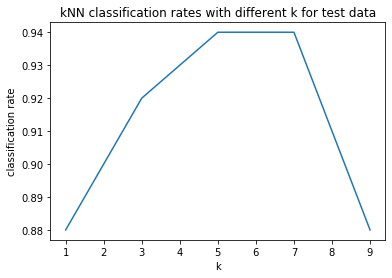

In [14]:
test_inputs, test_targets = load_test()

rates2 = []

for i in k:
    predictions = run_knn(i, train_inputs, train_targets, test_inputs)
    num_correct = 0
    for j in range(len(predictions)):
        if predictions[j] == test_targets[j]:
            num_correct += 1
    rates2.append(num_correct/len(predictions))

plt.plot(k, rates2)
plt.xlabel('k')
plt.ylabel('classification rate')
plt.title('kNN classification rates with different k for test data')
plt.show('./graphs/2.1.png')

2.2 

In [8]:
# %load ./q2_materials/logistic.py
""" Methods for doing logistic regression."""

import numpy as np
#from utils import *#sigmoid

def logistic_predict(weights, data):
    """
    Compute the probabilities predicted by the logistic classifier.

    Note: N is the number of examples and
          M is the number of features per example.

    Inputs:
        weights:    (M+1) x 1 vector of weights, where the last element
                    corresponds to the bias (intercepts).
        data:       N x M data matrix where each row corresponds
                    to one data point.
    Outputs:
        y:          :N x 1 vector of probabilities. This is the output of the classifier.
    """

    # TODO: Finish this function
    x = np.append(data, np.ones((data.shape[0], 1)), axis=1)
    z = np.matmul(x, weights)
    y = sigmoid(z)

    return y

def evaluate(targets, y):
    """
    Compute evaluation metrics.
    Inputs:
        targets : N x 1 vector of targets.
        y       : N x 1 vector of probabilities.
    Outputs:
        ce           : (scalar) Cross entropy. CE(p, q) = E_p[-log q]. Here we want to compute CE(targets, y)
        frac_correct : (scalar) Fraction of inputs classified correctly.
    """
    # TODO: Finish this function
    losses = -1 * targets * np.log(y + 0.0000001) - (1 - targets) * np.log(1 - y + 0.0000001)
    frac_correct = np.count_nonzero((np.rint(y))==targets) / targets.shape[0]
    ce = np.sum(losses)

    return ce, frac_correct

def logistic(weights, data, targets, hyperparameters):
    """
    Calculate negative log likelihood and its derivatives with respect to weights.
    Also return the predictions.

    Note: N is the number of examples and
          M is the number of features per example.

    Inputs:
        weights:    (M+1) x 1 vector of weights, where the last element
                    corresponds to bias (intercepts).
        data:       N x M data matrix where each row corresponds
                    to one data point.
        targets:    N x 1 vector of targets class probabilities.
        hyperparameters: The hyperparameters dictionary.

    Outputs:
        f:       The sum of the loss over all data points. This is the objective that we want to minimize.
        df:      (M+1) x 1 vector of derivative of f w.r.t. weights.
        y:       N x 1 vector of probabilities.
    """

    # TODO: Finish this function
    y = logistic_predict(weights, data)
    #print(y)
    f, frac_correct = evaluate(targets, y)

    dfdw = np.matmul(data.T, (y - targets))
    # append the derivative of CE loss wrt bias
    df = np.append(dfdw, np.ones((1, 1)), axis=0)

    return f, df, y


def logistic_pen(weights, data, targets, hyperparameters):
    """
    Calculate negative log likelihood and its derivatives with respect to weights.
    Also return the predictions.

    Note: N is the number of examples and
          M is the number of features per example.

    Inputs:
        weights:    (M+1) x 1 vector of weights, where the last element
                    corresponds to bias (intercepts).
        data:       N x M data matrix where each row corresponds
                    to one data point.
        targets:    N x 1 vector of targets class probabilities.
        hyperparameters: The hyperparameters dictionary.

    Outputs:
        f:             The sum of the loss over all data points. This is the objective that we want to minimize.
        df:            (M+1) x 1 vector of derivative of f w.r.t. weights.
    """

    # TODO: Finish this function
    f1, df1, y = logistic(weights, data, targets, hyperparameters)

    f = f1 + (hyperparameters['weight_regularization'] * (1/2) * np.sum(weights[:-1]**2, axis=0))
    df = df1 + 2 * weights

    return f, df, y
